In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
Ls = 2 ** np.arange(4, 9, 1) # Ignore broken L = 512 data (OOM)
ps = np.array([i for i in range(26)] + [30, 40, 50]) / 100
D = 1

shots = [10000 for _ in Ls]
shots[0] = 1000000
shots[1] = 1000000

In [4]:
# Load data. Rows are bip_mu, bip_std, trip_mu, trip_std; columns are p
data_list = [np.zeros((4, ps.shape[0])) for _ in Ls]
for i, L in enumerate(Ls):
    data = data_list[i]
    depth = int(L / 2)
    for j, p in enumerate(ps):
        try:
            filename = "data/{}_{}_{}_{}_{}_info.npy".format(L, depth, shots[i], p, D)
            data[:, j] = np.load(filename).flatten()
        except:
            print("No data for L = {}, p = {}".format(L, p))
            continue

No data for L = 512, p = 0.15
No data for L = 512, p = 0.16
No data for L = 512, p = 0.18
No data for L = 512, p = 0.25
No data for L = 512, p = 0.5


In [5]:
colors = sns.color_palette("tab10")

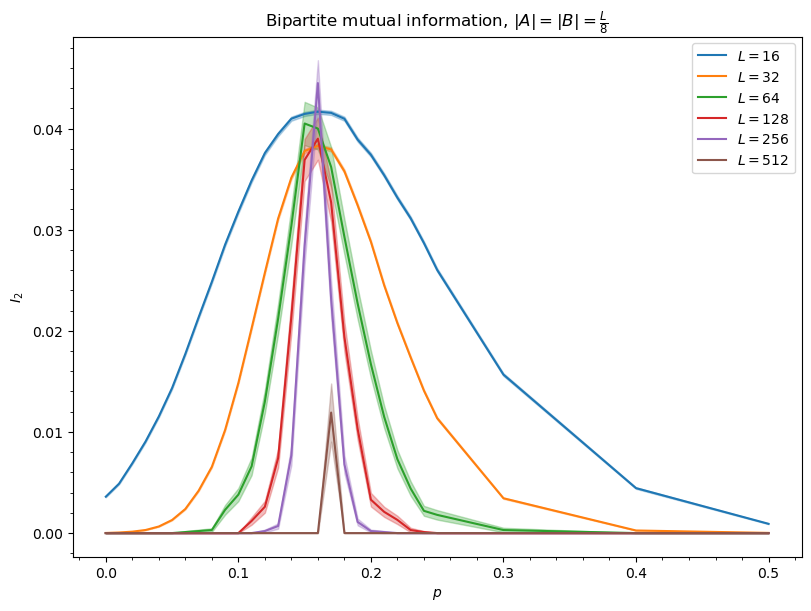

In [6]:
plt.subplots(figsize = (8, 6), layout = "constrained")

for i, L in enumerate(Ls):
    stub = "figs/{}_{}_{}_{}_".format(L, depth, shots[i], D)
    data = data_list[i]
    mu = data[0, :]
    std = data[1, :]
    plt.plot(ps, mu, label = "$L={}$".format(L), color = colors[i])
    plt.fill_between(ps, mu - std, mu + std, color = colors[i], alpha = 0.3)

plt.xlabel(r"$p$")
plt.ylabel(r"$I_2$")
plt.title(r"Bipartite mutual information, $\left|A\right|=\left|B\right|=\frac{L}{8}$")
plt.legend(loc = "upper right")
plt.minorticks_on()
plt.savefig(stub + "bip.png")

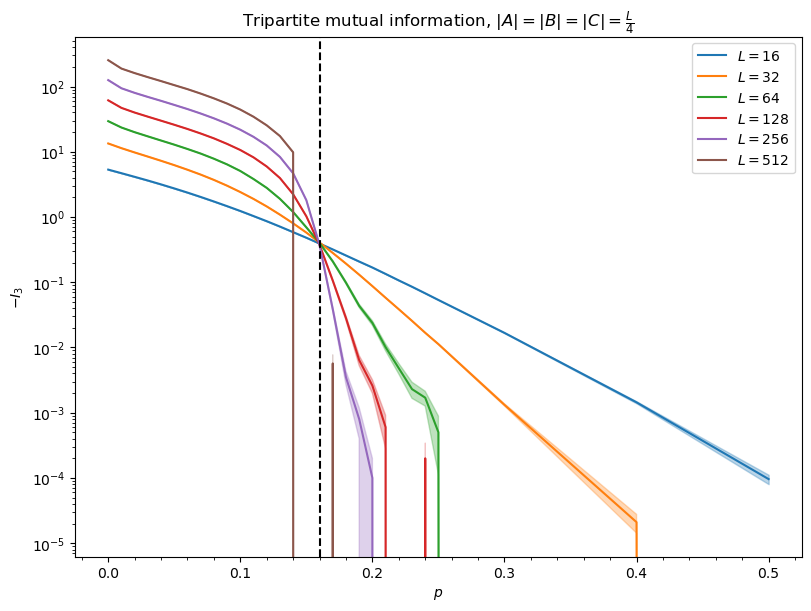

In [7]:
plt.subplots(figsize = (8, 6), layout = "constrained")

for i, L in enumerate(Ls):
    stub = "figs/{}_{}_{}_{}_".format(L, depth, shots[i], D)
    data = data_list[i]
    mu = data[2, :]
    std = data[3, :]
    plt.plot(ps, mu, label = "$L={}$".format(L), color = colors[i])
    plt.fill_between(ps, mu - std, mu + std, color = colors[i], alpha = 0.3)

plt.xlabel(r"$p$")
plt.ylabel(r"$-I_3$")
plt.title(r"Tripartite mutual information, $\left|A\right|=\left|B\right|=\left|C\right|=\frac{L}{4}$")
plt.legend(loc = "upper right")
plt.minorticks_on()
plt.yscale("log")
# plt.xlim(0.1, 0.2)
# plt.ylim(0.01, 10)
plt.axvline(x = 0.16, color = "black", linestyle = "--")
plt.savefig(stub + "trip.png")

In [ ]:
plt.subplots(figsize = (8, 6), layout = "constrained")

for i, L in enumerate(Ls):
    stub = "figs/{}_{}_{}_{}_".format(L, depth, shots[i], D)
    data = data_list[i]
    mu = data[2, :]
    std = data[3, :]
    plt.plot(ps, mu, label = "$L={}$".format(L), color = colors[i])
    plt.fill_between(ps, mu - std, mu + std, color = colors[i], alpha = 0.3)

plt.xlabel(r"$p$")
plt.ylabel(r"$-I_3$")
plt.title(r"Tripartite mutual information, $\left|A\right|=\left|B\right|=\left|C\right|=\frac{L}{4}$")
plt.legend(loc = "upper right")
plt.minorticks_on()
plt.yscale("log")
plt.xlim(0.1, 0.2)
plt.ylim(0.01, 10)
plt.axvline(x = 0.16, color = "black", linestyle = "--")
plt.savefig(stub + "trip_zoom.png")